## Modelo d rmamdom forest para datos de estudiantes





Base de datos : https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset?resource=download

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_path = r"C:\Users\Jaime Giraldo U\Modelo_Especializacion_Udea\MachineLearningOne\ExploringDatasets\Student_Performance\Student_performance_data _.csv"
df_student = pd.read_csv(file_path)

In [7]:
# Primeras filas
print(df_student.head())

# Información general del DataFrame
print(df_student.info())

# Estadísticas descriptivas
print(df_student.describe())

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

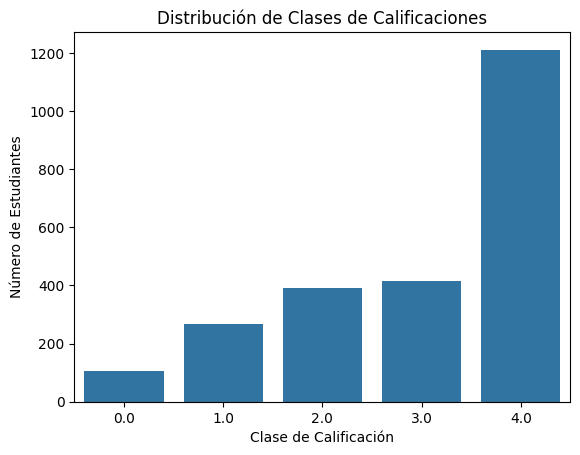

In [4]:
sns.countplot(x='GradeClass', data=df_student)
plt.title("Distribución de Clases de Calificaciones")
plt.xlabel("Clase de Calificación")
plt.ylabel("Número de Estudiantes")
plt.show()

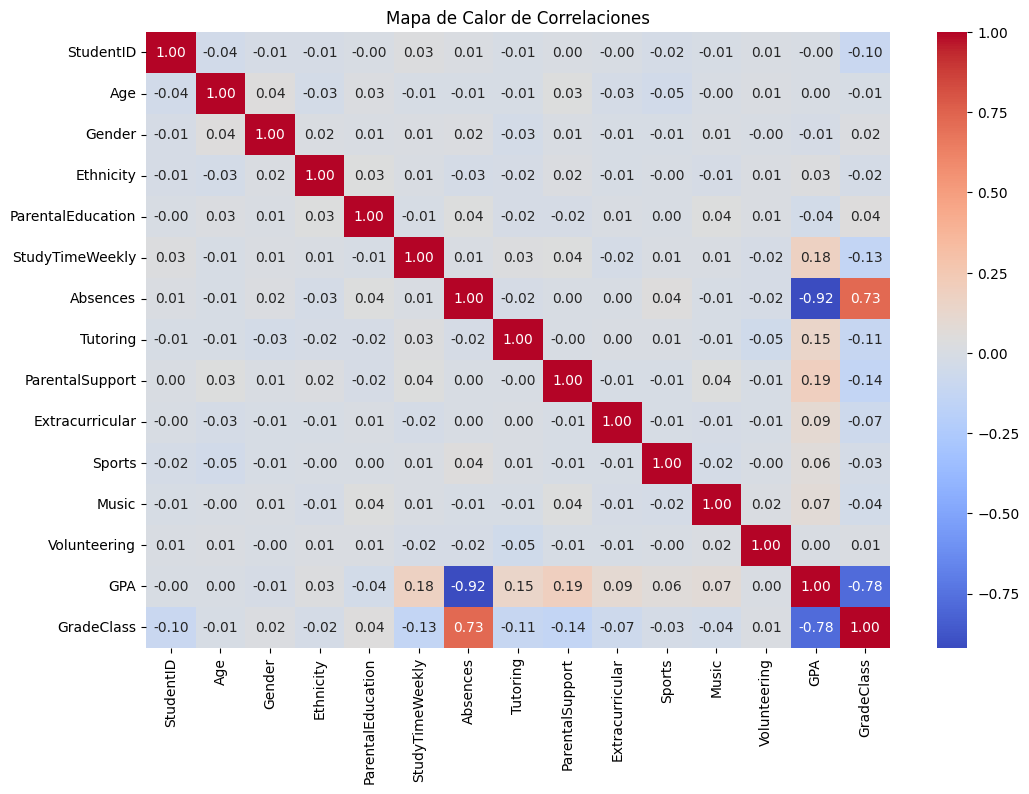

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapa de calor de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_student.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()


## Variables seleccionadas para el modelo debid a al corrrelaciones 

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset (ajusta la ruta)
file_path = r"C:\Users\Jaime Giraldo U\Modelo_Especializacion_Udea\MachineLearningOne\ExploringDatasets\Student_Performance\Student_performance_data _.csv"
df = pd.read_csv(file_path)
# Verificamos columnas clave
vars_modelo = ["GPA", "GradeClass", "Absences", "StudyTimeWeekly", 
               "ParentalSupport", "Tutoring", "ParentalEducation",
               "Age", "Gender", "Ethnicity"]

df = df[vars_modelo].dropna()
df.head()


,GPA,GradeClass,Absences,StudyTimeWeekly,ParentalSupport,Tutoring,ParentalEducation,Age,Gender,Ethnicity
0,2.929196,2.0,7,19.833723,2,1,2,17,1,0
1,3.042915,1.0,0,15.408756,1,0,1,18,0,0
2,0.112602,4.0,26,4.210570,2,0,3,15,0,2
3,2.054218,3.0,14,10.028829,3,0,3,17,1,0
4,1.288061,4.0,17,4.672495,3,1,2,17,1,0


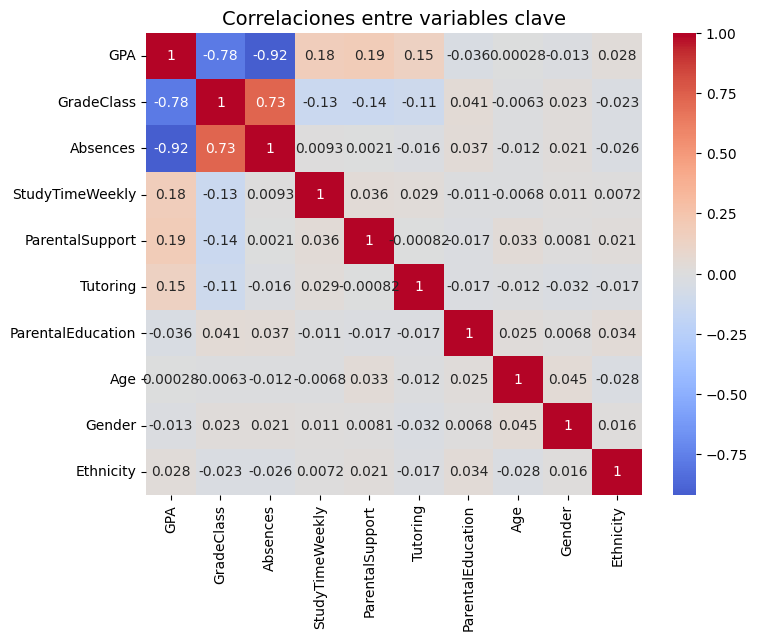

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlaciones entre variables clave", fontsize=14)
plt.show()


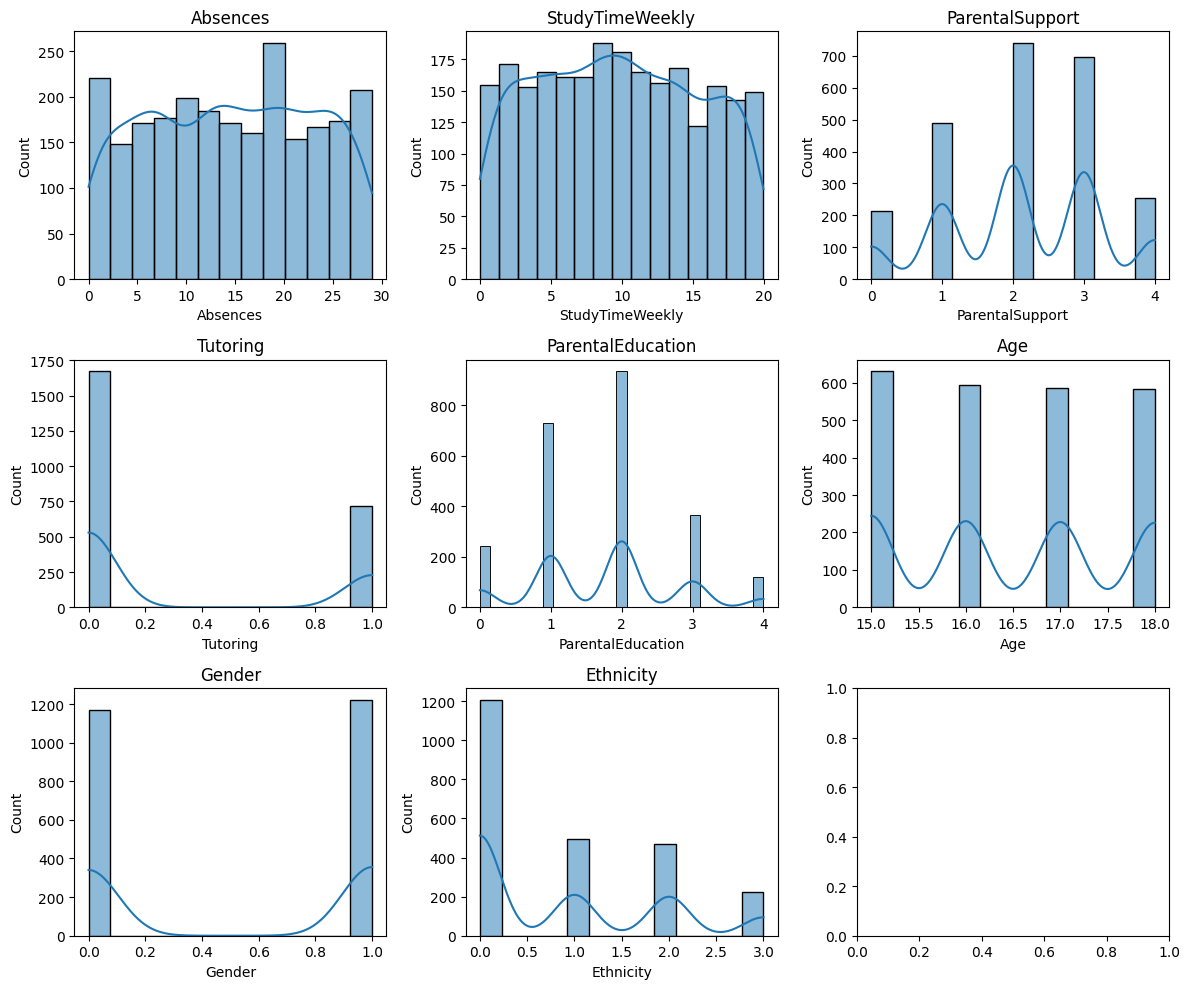

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(12,10))
axes = axes.flatten()
for i, col in enumerate(vars_modelo[2:]):  # sin GPA y GradeClass
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


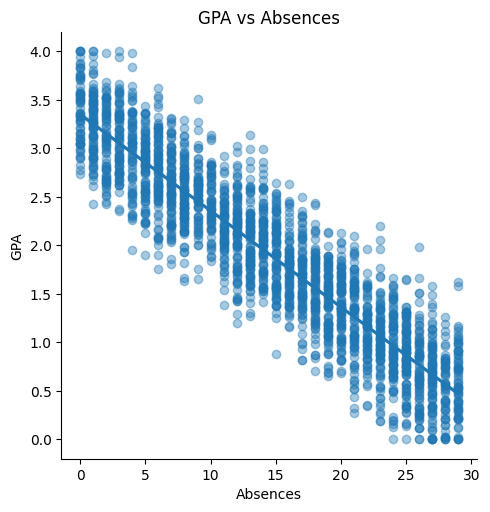

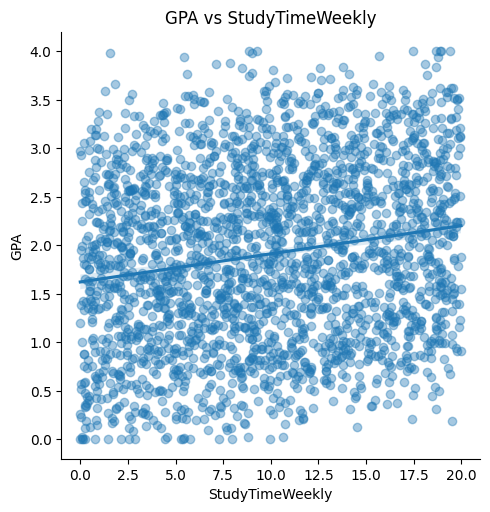

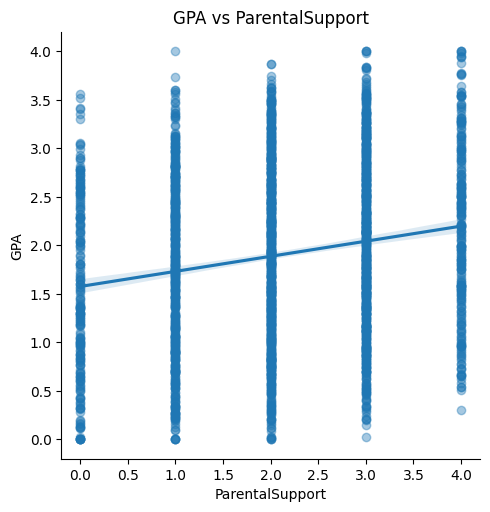

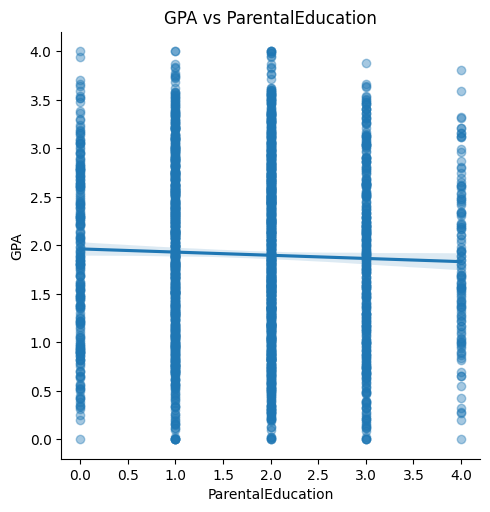

In [14]:
for col in ["Absences", "StudyTimeWeekly", "ParentalSupport", "ParentalEducation"]:
    sns.lmplot(data=df, x=col, y="GPA", scatter_kws={'alpha':0.4})
    plt.title(f"GPA vs {col}")
    plt.show()

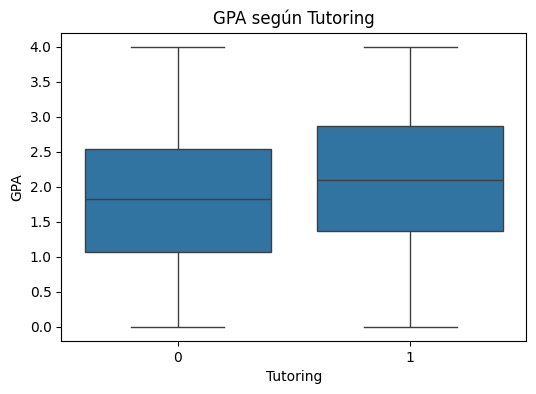

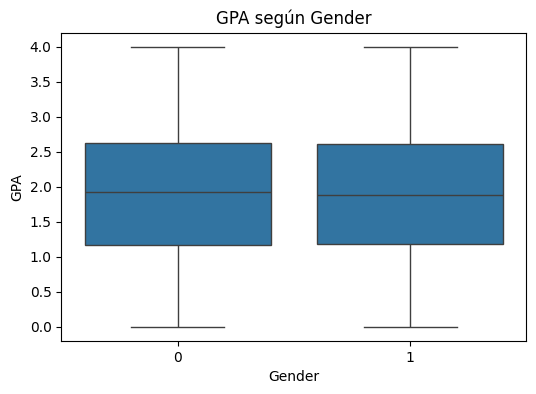

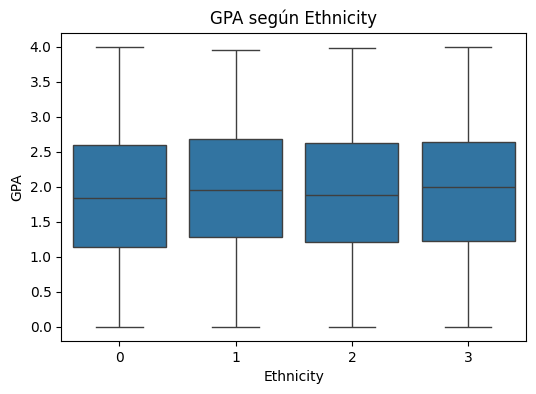

In [15]:
categoricas = ["Tutoring", "Gender", "Ethnicity"]
for col in categoricas:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=col, y="GPA")
    plt.title(f"GPA según {col}")
    plt.show()

In [16]:
print(df)

           GPA  GradeClass  Absences  StudyTimeWeekly  ParentalSupport  \
0     2.929196         2.0         7        19.833723                2   
1     3.042915         1.0         0        15.408756                1   
2     0.112602         4.0        26         4.210570                2   
3     2.054218         3.0        14        10.028829                3   
4     1.288061         4.0        17         4.672495                3   
...        ...         ...       ...              ...              ...   
2387  3.455509         0.0         2        10.680555                4   
2388  3.279150         4.0         4         7.583217                4   
2389  1.142333         2.0        20         6.805500                2   
2390  1.803297         1.0        17        12.416653                2   
2391  2.140014         1.0        13        17.819907                2   

      Tutoring  ParentalEducation  Age  Gender  Ethnicity  
0            1                  2   17       1     

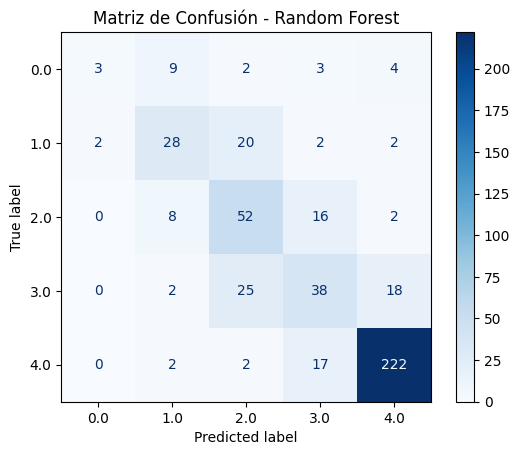

,precision,recall,f1-score,support
0.0,0.600000,0.142857,0.230769,21.000000
1.0,0.571429,0.518519,0.543689,54.000000
2.0,0.514851,0.666667,0.581006,78.000000
3.0,0.500000,0.457831,0.477987,83.000000
4.0,0.895161,0.913580,0.904277,243.000000
accuracy,0.716075,0.716075,0.716075,0.716075
macro avg,0.616288,0.539891,0.547546,479.000000
weighted avg,0.715323,0.716075,0.707591,479.000000


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Cargar el dataset
file_path = r"C:\Users\Jaime Giraldo U\Modelo_Especializacion_Udea\MachineLearningOne\ExploringDatasets\Student_Performance\Student_performance_data _.csv"
df = pd.read_csv(file_path)

# Variables a excluir
excluded_cols = ['StudentID', 'GPA']
target = 'GradeClass'

# Variables a escalar
scale_cols = ['StudyTimeWeekly', 'Absences']

# Variables predictoras
features = [col for col in df.columns if col not in excluded_cols + [target]]

# Escalar solo las columnas necesarias
scaler = MinMaxScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# División del dataset
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Definir el modelo y los parámetros para GridSearch
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Métricas de evaluación
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión
ConfusionMatrixDisplay(conf_matrix, display_labels=best_model.classes_).plot(cmap='Blues')
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# Reporte de clasificación
pd.DataFrame(report).transpose()

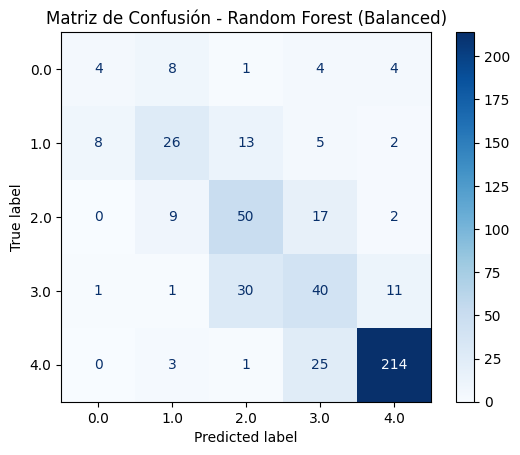

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.31      0.19      0.24        21
         1.0       0.55      0.48      0.51        54
         2.0       0.53      0.64      0.58        78
         3.0       0.44      0.48      0.46        83
         4.0       0.92      0.88      0.90       243

    accuracy                           0.70       479
   macro avg       0.55      0.54      0.54       479
weighted avg       0.70      0.70      0.70       479



In [19]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Evaluación del modelo
# ==============================================================================
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# ------------------------------------------------------------------------------
# 1. Cargar datos
# ------------------------------------------------------------------------------
file_path = r"C:\Users\Jaime Giraldo U\Modelo_Especializacion_Udea\MachineLearningOne\ExploringDatasets\Student_Performance\Student_performance_data _.csv"
df = pd.read_csv(file_path)

# ------------------------------------------------------------------------------
# 2. Preprocesamiento
# ------------------------------------------------------------------------------

# Variables a excluir
excluded_cols = ['StudentID', 'GPA']
target = 'GradeClass'

# Variables numéricas a escalar
scale_cols = ['StudyTimeWeekly', 'Absences']

# Variables predictoras
features = [col for col in df.columns if col not in excluded_cols + [target]]

# Escalado MinMax solo para algunas columnas
scaler = MinMaxScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# Separación de datos
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ------------------------------------------------------------------------------
# 3. Modelo Random Forest con class_weight='balanced'
# ------------------------------------------------------------------------------
model = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# ------------------------------------------------------------------------------
# 4. Evaluación del modelo
# ------------------------------------------------------------------------------
y_pred = best_model.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=best_model.classes_).plot(cmap='Blues')
plt.title("Matriz de Confusión - Random Forest (Balanced)")
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


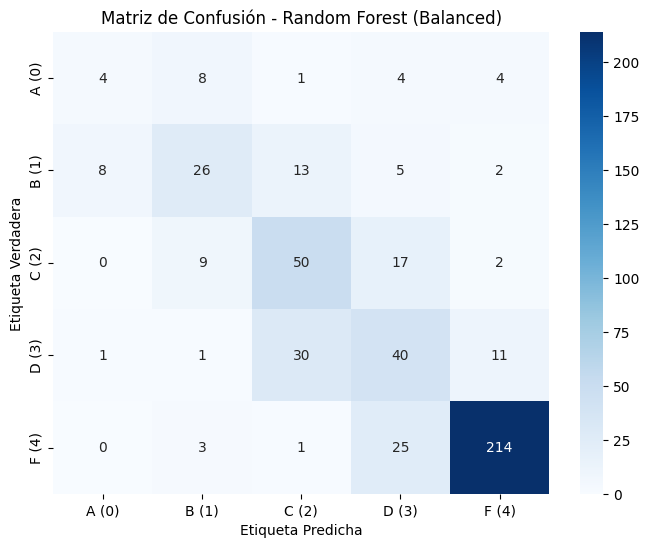

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtener matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Etiquetas de clases
labels = ['A (0)', 'B (1)', 'C (2)', 'D (3)', 'F (4)']

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusión - Random Forest (Balanced)")
plt.show()


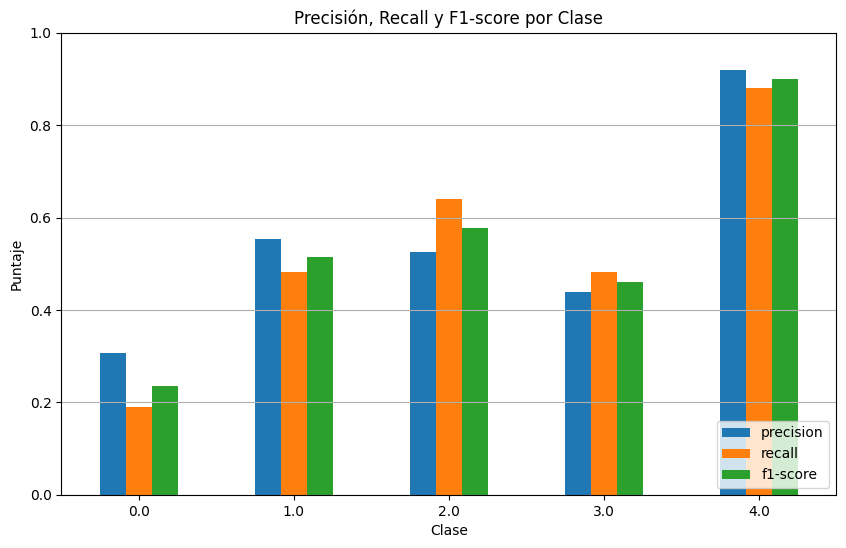

In [21]:
import pandas as pd

# Crear DataFrame del reporte de clasificación
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

# Filtrar solo clases (excluye avg)
report_df = report_df.iloc[:5]

# Plot
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title("Precisión, Recall y F1-score por Clase")
plt.xlabel("Clase")
plt.ylabel("Puntaje")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.legend(loc='lower right')
plt.show()


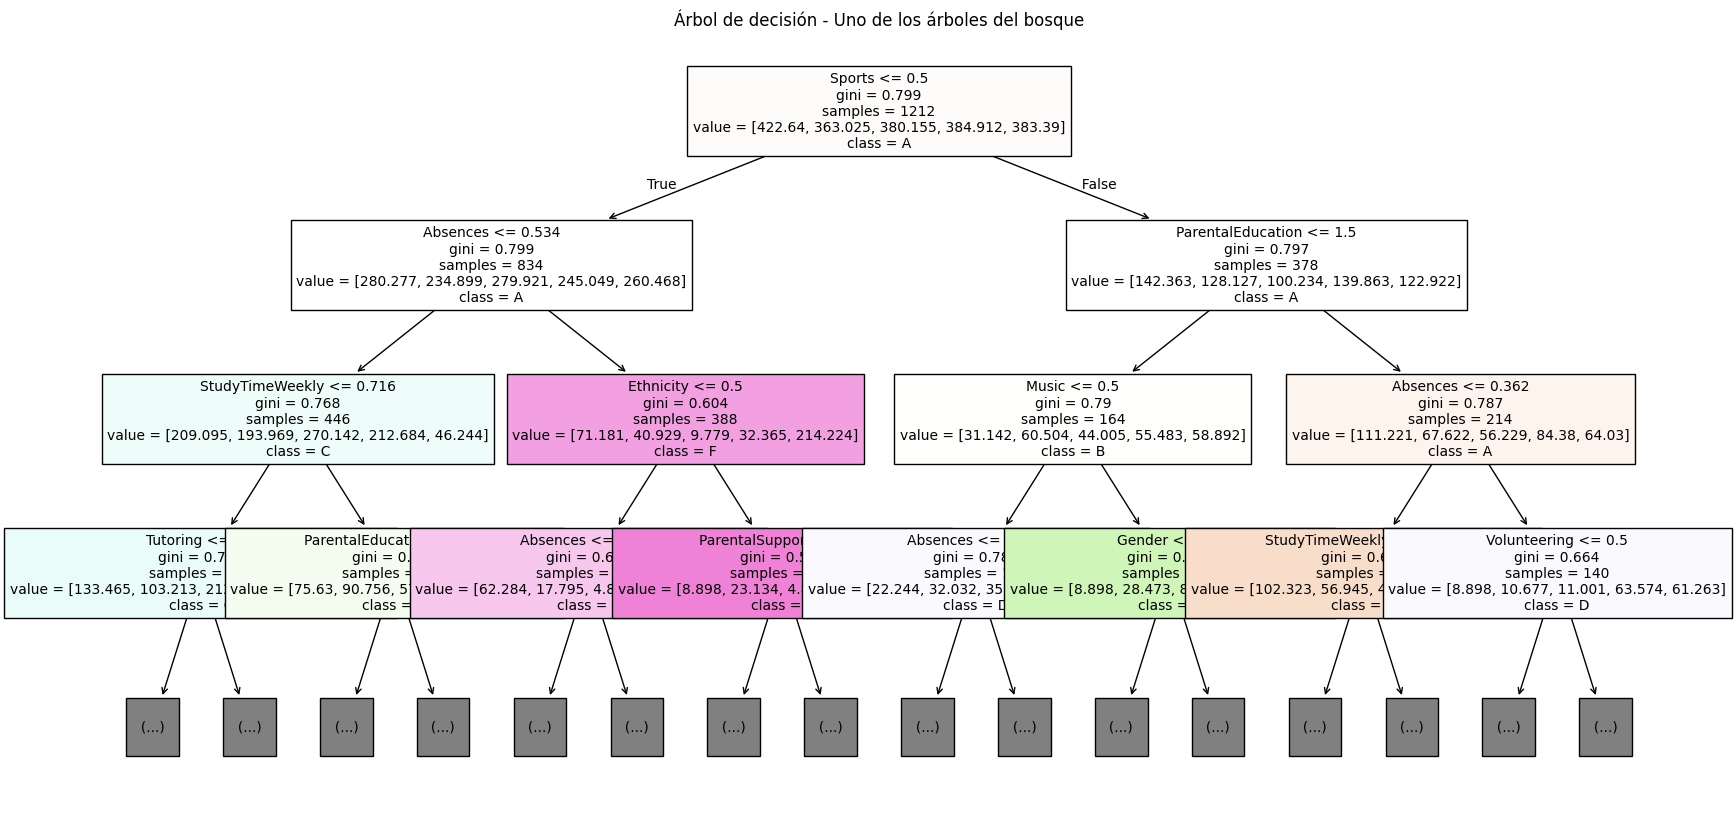

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Seleccionar uno de los árboles del bosque
estimator = best_model.estimators_[0]  # Puedes cambiar el índice si quieres ver otro árbol

# Crear el gráfico
plt.figure(figsize=(20, 10))
plot_tree(estimator,
          feature_names=X.columns,
          class_names=['A', 'B', 'C', 'D', 'F'],
          filled=True,
          max_depth=3,  # Para no hacerlo muy complejo
          fontsize=10)
plt.title("Árbol de decisión - Uno de los árboles del bosque")
plt.show()

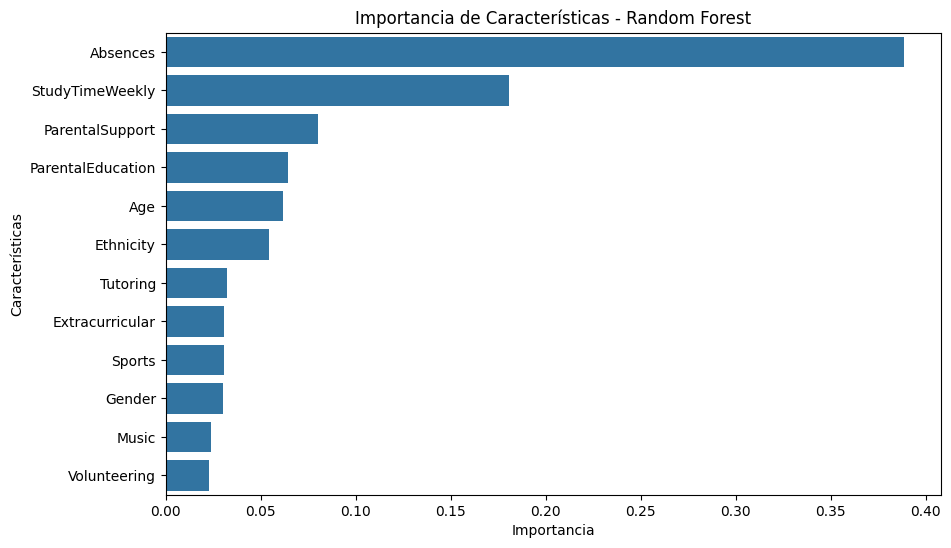

In [23]:
importances = best_model.feature_importances_
feature_names = X.columns

# Crear DataFrame ordenado
feat_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance)
plt.title("Importancia de Características - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()
